In [1]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 

import numpy as np
import matplotlib.pyplot as plt
from pyfrechet.metric_spaces import MetricData, RiemannianManifold, CorrFrobenius, MetricSpace
from geomstats.geometry.hypersphere import Hypersphere
import pandas as pd
from pyfrechet.metric_spaces.correlation.nearcorr import nearcorr
from tqdm import tqdm
import seaborn as sns
from joblib import Parallel, delayed
from scipy.stats import norm

INFO: Using numpy backend
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/fdasrsf/umap_metric.py:22: NumbaDeprecationWarning:The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/fdasrsf/umap_metric.py:54: NumbaDeprecationWarning:The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/pyt

# R with multiplicative noise

In [2]:
def m(x, theta, mu):
    return theta * x + (1-theta)*mu

def sim(N, theta, sig, mu):
    x = np.zeros(N) + mu
    for i in range(1,N):
        x[i] = m(x[i-1], theta, mu) + sig*np.random.randn()
    return x

def sim_mul(N, theta, sig, mu):
    x = np.zeros(N) + mu
    for i in range(1,N):
        x[i] = (1 + sig*np.random.randn()) * m(x[i-1], theta, mu)
    return x


def sim_sin(N, theta, sig, mu):
    x = np.zeros(N) + mu
    for i in range(1,N):
        k = (1 - 2*np.random.binomial(1,0.5)) * np.random.random_integers(1, 4)
        z = m(x[i-1], theta, mu)
        x[i] = z - np.sin(np.pi*k*z)/np.pi/k
    return x

In [10]:
M = 1000 # number of replicates
B = 500 # number of bootstrap replicates

phis = np.linspace(0, 1, 11)
Ts = [100, 250, 500, 1000]

df = pd.DataFrame(columns=['T', 'phi', 'replicate_id', 'Dt', 'boot_mean_Dt', 'boot_sig_Dt'])

mean = 1.5
noise_var = 0.2

def bootstrap_mu_sig(x, B):
    bootstrap = np.zeros(B)
    for b in range(B):
        permed = np.random.permutation(x)
        bootstrap[b] = np.mean(np.power(np.diff(permed), 2))
    
    sig_hat = np.sqrt(bootstrap.var())
    mu_hat = bootstrap.mean()
    
    return mu_hat, sig_hat


for T in Ts:
    for phi in phis:
        print(f"Running T={T} phi={phi}")
        for replicate_id in tqdm(range(M)):
            x = sim_mul(T, phi, noise_var, mean)
            Dt = np.mean(np.power(np.diff(x), 2))

            boot_mean_Dt, boot_sig_Dt = bootstrap_mu_sig(x, B)

            df.loc[len(df)] = [T, phi, replicate_id, Dt, boot_mean_Dt, boot_sig_Dt]

df.to_csv('./results_R_mult_noise.csv')

Running T=100 phi=0.0


100%|██████████| 1000/1000 [00:05<00:00, 192.76it/s]


Running T=100 phi=0.1


100%|██████████| 1000/1000 [00:04<00:00, 200.27it/s]


Running T=100 phi=0.2


100%|██████████| 1000/1000 [00:04<00:00, 200.95it/s]


Running T=100 phi=0.30000000000000004


100%|██████████| 1000/1000 [00:04<00:00, 202.49it/s]


Running T=100 phi=0.4


100%|██████████| 1000/1000 [00:04<00:00, 203.49it/s]


Running T=100 phi=0.5


100%|██████████| 1000/1000 [00:04<00:00, 204.23it/s]


Running T=100 phi=0.6000000000000001


100%|██████████| 1000/1000 [00:04<00:00, 204.24it/s]


Running T=100 phi=0.7000000000000001


100%|██████████| 1000/1000 [00:04<00:00, 203.23it/s]


Running T=100 phi=0.8


100%|██████████| 1000/1000 [00:04<00:00, 203.85it/s]


Running T=100 phi=0.9


100%|██████████| 1000/1000 [00:04<00:00, 203.62it/s]


Running T=100 phi=1.0


100%|██████████| 1000/1000 [00:04<00:00, 202.70it/s]


Running T=250 phi=0.0


100%|██████████| 1000/1000 [00:06<00:00, 150.58it/s]


Running T=250 phi=0.1


100%|██████████| 1000/1000 [00:06<00:00, 151.64it/s]


Running T=250 phi=0.2


100%|██████████| 1000/1000 [00:06<00:00, 151.50it/s]


Running T=250 phi=0.30000000000000004


100%|██████████| 1000/1000 [00:06<00:00, 151.49it/s]


Running T=250 phi=0.4


100%|██████████| 1000/1000 [00:06<00:00, 151.22it/s]


Running T=250 phi=0.5


100%|██████████| 1000/1000 [00:06<00:00, 150.74it/s]


Running T=250 phi=0.6000000000000001


100%|██████████| 1000/1000 [00:06<00:00, 150.43it/s]


Running T=250 phi=0.7000000000000001


100%|██████████| 1000/1000 [00:06<00:00, 150.29it/s]


Running T=250 phi=0.8


100%|██████████| 1000/1000 [00:06<00:00, 149.74it/s]


Running T=250 phi=0.9


100%|██████████| 1000/1000 [00:06<00:00, 149.47it/s]


Running T=250 phi=1.0


100%|██████████| 1000/1000 [00:06<00:00, 149.24it/s]


Running T=500 phi=0.0


100%|██████████| 1000/1000 [00:09<00:00, 105.94it/s]


Running T=500 phi=0.1


100%|██████████| 1000/1000 [00:09<00:00, 105.96it/s]


Running T=500 phi=0.2


100%|██████████| 1000/1000 [00:09<00:00, 105.67it/s]


Running T=500 phi=0.30000000000000004


100%|██████████| 1000/1000 [00:09<00:00, 105.73it/s]


Running T=500 phi=0.4


100%|██████████| 1000/1000 [00:09<00:00, 105.53it/s]


Running T=500 phi=0.5


100%|██████████| 1000/1000 [00:09<00:00, 103.97it/s]


Running T=500 phi=0.6000000000000001


100%|██████████| 1000/1000 [00:10<00:00, 93.36it/s]


Running T=500 phi=0.7000000000000001


100%|██████████| 1000/1000 [00:09<00:00, 103.97it/s]


Running T=500 phi=0.8


100%|██████████| 1000/1000 [00:09<00:00, 104.84it/s]


Running T=500 phi=0.9


100%|██████████| 1000/1000 [00:09<00:00, 104.73it/s]


Running T=500 phi=1.0


100%|██████████| 1000/1000 [00:09<00:00, 104.45it/s]


Running T=1000 phi=0.0


100%|██████████| 1000/1000 [00:14<00:00, 66.72it/s]


Running T=1000 phi=0.1


100%|██████████| 1000/1000 [00:15<00:00, 66.62it/s]


Running T=1000 phi=0.2


100%|██████████| 1000/1000 [00:15<00:00, 66.51it/s]


Running T=1000 phi=0.30000000000000004


100%|██████████| 1000/1000 [00:15<00:00, 66.47it/s]


Running T=1000 phi=0.4


100%|██████████| 1000/1000 [00:15<00:00, 66.37it/s]


Running T=1000 phi=0.5


100%|██████████| 1000/1000 [00:15<00:00, 66.35it/s]


Running T=1000 phi=0.6000000000000001


100%|██████████| 1000/1000 [00:15<00:00, 66.22it/s]


Running T=1000 phi=0.7000000000000001


100%|██████████| 1000/1000 [00:15<00:00, 66.25it/s]


Running T=1000 phi=0.8


100%|██████████| 1000/1000 [00:15<00:00, 66.11it/s]


Running T=1000 phi=0.9


100%|██████████| 1000/1000 [00:15<00:00, 66.05it/s]


Running T=1000 phi=1.0


100%|██████████| 1000/1000 [00:15<00:00, 65.82it/s]


100%|██████████| 1000/1000 [00:14<00:00, 70.89it/s]

% rejects under H1 1.0
% rejects under H0 0.062


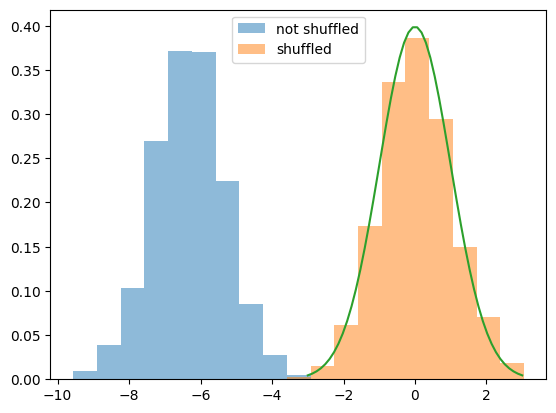

In [9]:
res = np.zeros((1000, 4))

mu = 1.5
theta = 0.2

N = 1_000
B = 500

def bootstrap_mu_sig(x, B):
    # DIRECT ESTIMATION - check this a bit more
    #
    # D_XY_XZ = np.zeros((2, B))
    # for b in range(B):
    #     idx = np.random.randint(N, size=3)
    #     D_XY_XZ[0, b] = np.abs(x[idx[0]] - x[idx[1]])
    #     D_XY_XZ[1, b] = np.abs(x[idx[0]] - x[idx[2]])

    # cov = np.cov(D_XY_XZ)
    # sig_hat = np.sqrt(cov[0,0] + 2*cov[0,1]) / np.sqrt(B)
    # mu_hat = D_XY_XZ[0,:].mean()

    # BOOTSTRAP VERSION
    # 
    bootstrap = np.zeros(B)
    for b in range(B):
        permed = np.random.permutation(x)
        # bootstrap[b] = np.mean(np.abs(np.diff(permed)))
        bootstrap[b] = np.mean(np.power(np.diff(permed), 2))
    
    sig_hat = np.sqrt(bootstrap.var())
    mu_hat = bootstrap.mean()
    
    return mu_hat, sig_hat

for i in tqdm(range(res.shape[0])):
    x = sim_mul(N, theta, 0.13, mu)
    
    # res[i,0] = np.mean(np.abs(np.diff(x)))
    res[i,0] = np.mean(np.power(np.diff(x), 2))

    permed = np.random.permutation(x)
    # res[i,1] =  np.mean(np.abs(np.diff(permed)))
    res[i,1] = np.mean(np.power(np.diff(permed), 2))

    mu_hat, sig_hat = bootstrap_mu_sig(x, B)
    res[i, 2] = mu_hat
    res[i, 3] = sig_hat

plt.hist((res[:, 0] - res[:, 2]) / res[:, 3], label='not shuffled', alpha=0.5, density=True)
plt.hist((res[:, 1] - res[:, 2]) / res[:, 3], label='shuffled', alpha=0.5, density=True)

_x = np.linspace(-3, 3)
plt.plot(_x, norm.pdf(_x))

print("% rejects under H1", (np.abs((res[:, 0] - res[:, 2]) / res[:, 3]) > norm.ppf(0.975)).mean())
print("% rejects under H0", (np.abs((res[:, 1] - res[:, 2]) / res[:, 3]) > norm.ppf(0.975)).mean())

plt.legend()


# Wasserstein

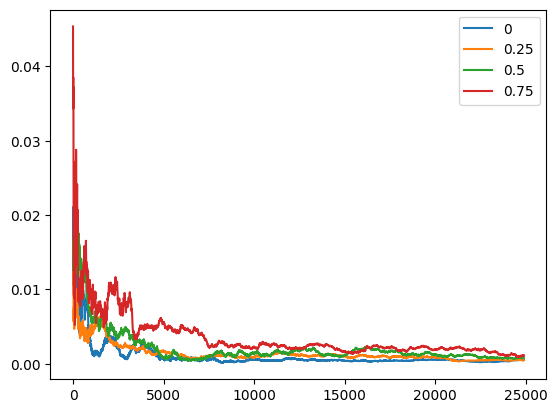

In [316]:
from scipy import stats
from pyfrechet.metric_spaces import *
import pyfrechet.metric_spaces.wasserstein_1d as W1d

def gamma(x, theta, mu):
    # the rvs are represented as their quantile functions, so interpolation is euclidean
    return theta * x + (1-theta)*mu

def sim(N, theta, mu):
    x = np.zeros((N, mu.shape[0])) + mu
    for i in range(1,N):
        z = gamma(x[i-1], theta, mu)

        k = (1 - 2*np.random.binomial(1,0.5)) * np.random.random_integers(1, 4)
        x[i, :] = z - np.sin(np.pi*k*z)/np.pi/abs(k)
    return x

STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs


N = 25_000
thetas = [0, 0.25, 0.5, 0.75]
mu = STD_NORMAL_Q

for j in range(len(thetas)):
    theta = thetas[j]
    x = sim(N, theta, mu)

    M = W1d.Wasserstein1D()

    mu_hats = np.zeros_like(x)
    errs = np.zeros(N)
    for i in range(2,N):
        mu_hats[i,:] = MetricData(M, x[:i,:]).frechet_mean()
        errs[i] = M.d(mu, mu_hats[i,:])

    plt.plot(errs[100:], label=theta)

plt.legend()


100%|██████████| 100/100 [00:01<00:00, 52.22it/s]


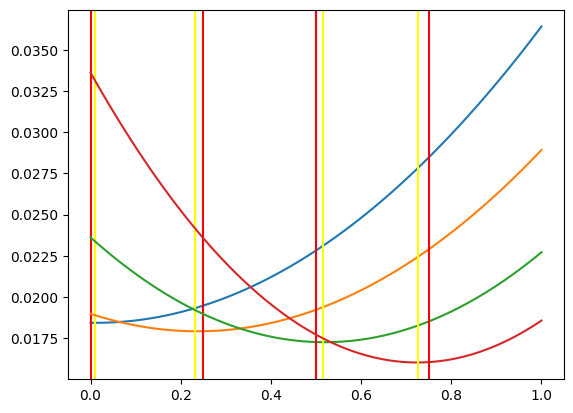

In [318]:
tgrid = np.linspace(0,1,100)

N = 1_000
thetas = [0, 0.25, 0.5, 0.75]
mu = STD_NORMAL_Q

for j in range(len(thetas)):
    theta = thetas[j]
    x = sim(N, theta, mu)

    M = W1d.Wasserstein1D()
    mu_hat = MetricData(M, x).frechet_mean()
    def calc(_theta): return np.array([ M._d(gamma(x[j-1,:], _theta, mu_hat), x[j,:])**2 for j in range(1, N) ]).mean()

    errs = np.array([ calc(tgrid[i]) for i in tqdm(range(tgrid.shape[0])) ])
    plt.plot(tgrid, errs, label=theta)
    plt.axvline(theta, color='red', label=theta)
    plt.axvline(tgrid[np.argmin(errs)], color='yellow', label=theta)



# tgrid = np.linspace(0,1,100)
# def calc(_theta): return np.array([ M._d(gamma(x[j-1,:], _theta, mu_hat), x[j,:])**2 for j in range(1, N) ]).mean()
# errs = np.array([ calc(tgrid[i]) for i in tqdm(range(tgrid.shape[0])) ])

# plt.plot(tgrid, errs)
# plt.axvline(theta, color='red')
# plt.axvline(tgrid[np.argmin(errs)], color='yellow')

100%|██████████| 1000/1000 [17:39<00:00,  1.06s/it]

% rejects under H1 1.0
% rejects under H0 0.054


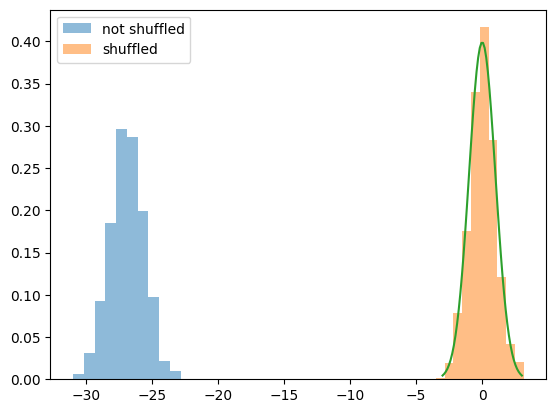

In [303]:
def Dn(x):
    # faster to do by hand to get vectorization
    return np.sqrt(np.sum(np.power(np.diff(x, axis=0), 2), axis=1)).mean() * np.sqrt(W1d.Wasserstein1D.GRID[1] - W1d.Wasserstein1D.GRID[0])

def bootstrap_mu_sig(x, B):
    # DIRECT ESTIMATION - check this a bit more
    #
    # D_XY_XZ = np.zeros((2, B))
    # for b in range(B):
    #     idx = np.random.randint(N, size=3)
    #     D_XY_XZ[0, b] = np.abs(x[idx[0]] - x[idx[1]])
    #     D_XY_XZ[1, b] = np.abs(x[idx[0]] - x[idx[2]])

    # cov = np.cov(D_XY_XZ)
    # sig_hat = np.sqrt(cov[0,0] + 2*cov[0,1]) / np.sqrt(B)
    # mu_hat = D_XY_XZ[0,:].mean()

    # BOOTSTRAP VERSION
    # 

    # def boot():
    #     return Dn(np.random.permutation(x))

    # bootstrap = np.array(Parallel(n_jobs=-1)(delayed(boot)() for i in range(B)))

    bootstrap = np.zeros(B)
    for b in range(B):
        bootstrap[b] = Dn(np.random.permutation(x))
    
    sig_hat = np.sqrt(bootstrap.var())
    mu_hat = bootstrap.mean()
    
    return mu_hat, sig_hat


res = np.zeros((1000, 4))

N = 1_000
B = 1_000

theta = 0.5
mu = STD_NORMAL_Q

for i in tqdm(range(res.shape[0])):
    x = sim(N, theta, mu)
    
    res[i,0] = Dn(x)

    permed = np.random.permutation(x)
    res[i,1] = Dn(permed)

    mu_hat, sig_hat = bootstrap_mu_sig(x, B)
    res[i, 2] = mu_hat
    res[i, 3] = sig_hat

plt.hist((res[:, 0] - res[:, 2]) / res[:, 3], label='not shuffled', alpha=0.5, density=True)
plt.hist((res[:, 1] - res[:, 2]) / res[:, 3], label='shuffled', alpha=0.5, density=True)

_x = np.linspace(-3, 3)
plt.plot(_x, norm.pdf(_x))

print("% rejects under H1", (np.abs((res[:, 0] - res[:, 2]) / res[:, 3]) > norm.ppf(0.975)).mean())
print("% rejects under H0", (np.abs((res[:, 1] - res[:, 2]) / res[:, 3]) > norm.ppf(0.975)).mean())

plt.legend()

